<a href="https://colab.research.google.com/github/YazCodes/Sentiment-Analysis-Twitter/blob/main/SentimentAnalysisTwitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np

# libraries for data preprocessing
import nltk
# download modules available with NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.tokenize import TweetTokenizer #text preprocessing
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# libraries for data split and feature extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# library for evaluation
from sklearn import metrics

# libraries for ML algorithms for the experiment 
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

# libraries for data plotting
import matplotlib.pyplot as plt 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#uploading the dataset
# read csv file into a dataframe
df = pd.read_csv('/content/train.csv')

# find out the number of entires 
print(f'Number of entries: {len(df)}')
df.head()

Number of entries: 16363


,Id,Text,Sentiment
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


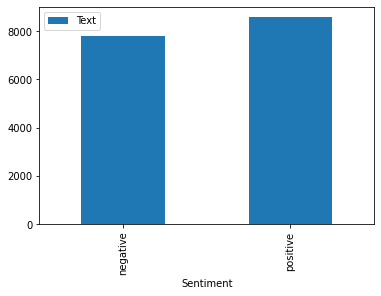

In [3]:
#Analysising the data - Compare the amount of postitive and negative tweets 
temp_df = df[['Text', 'Sentiment']] #Using the text and sentiment colomn to plot the graph
temp_df = temp_df.groupby('Sentiment').count() #count the number of diffrent elements in the sentiment column 
temp_df.plot.bar() #plot the bar chart 

In [4]:
#Data cleaning  - Important step as the ML model and data processing cannot start if the dataset contains missing values

df.isnull().values.any() #This shows if there are any missing values in the dataset. True = yes false = No

df = df.dropna() #drop any rows with missing values - just in case 

print(f'Number of entries: {len(df)}') #check if the number of entries have changed

Number of entries: 16363


**The results of inital data analysis** 
The dataset contains 16363 entires consisting of three columns. 


1.   ID - The Id number of each text 
2.   Text - The tweet in text format 
3.   Sentiment - Indicating if the text is postive or negative


The bar charts show the data set contains under 8000 negative tweets and about 8000 postive tweets. So nearly an equal split. 

During data cleaning there was no missing values

In [5]:
#Data preprocessing - This transforms the raw data into an understantable format 

#Tokenisation - This is the process in NLP of splitting up text into smaller individual words called Tokens
#Tokenisation is important as large amounts of text data needs to be broken down into smaller units of text so our ML models can understand. 

#Text preprocessing - cleaning and preparing text data
#Selecting a tokenizer model. -  word_tokenize - Tokenizer for normal text
from nltk.tokenize import word_tokenize


list_tokenised_text = []  #Creat an empty list
#for loop 
for text in df['Text']: # Converting text to tokens by iterating through each row in 'Text' columm of the dataset. 
  tokenized_text =  word_tokenize(text)
  list_tokenised_text.append(tokenized_text) #Adding the tokenzie text inside the empty list 

print(list_tokenised_text[:2]) #the list containing the tokenzied text - [:2] = showing the first two items in the list

#After tokenizing we need to put them back into sentences - as for feature generation, vectorisers you need to imput sentences 

list_tokenised_sentences = [] #creating an empty list to keep the tokenised sentences 
for tokens in list_tokenised_text:
  text = ' '.join(tokens) #each sentence will be joined by a space 
  list_tokenised_sentences.append(text)

# adding a  new column to data frame
df['Tokenised_Text'] = list_tokenised_sentences



[['Sooo', 'SAD', 'I', 'will', 'miss', 'you', 'here', 'in', 'San', 'Diego', '!', '!', '!'], ['my', 'boss', 'is', 'bullying', 'me', '...']]


In [12]:
#Text normalisation -  the process of transforming a text into a canonical (standard) form. For example, the word “gooood” and “gud” can be transformed to “good”, its canonical form.

#breaking the word into it's smallest form

wnl = WordNetLemmatizer() #creating an instance of WordNetLemmatizer(), converting a word to its base form. 
list_lemmatised_tokens = []
# iterate through each list of tokens and lemmatise the tokens
for tokens in list_tokenised_text:
  lemma_words = []
  for word in tokens:
    lemma_word=wnl.lemmatize(word)
    lemma_words.append(lemma_word)
  list_lemmatised_tokens.append(lemma_words)

print(list_lemmatised_tokens[:2])

list_lemmatised_sentences = []
for tokens in list_lemmatised_tokens:
  text = ' '.join(tokens)
  list_lemmatised_sentences.append(text)

# add new column to data frame
df['Lemmatised_Text'] = list_lemmatised_sentences

[['Sooo', 'SAD', 'I', 'will', 'miss', 'you', 'here', 'in', 'San', 'Diego', '!', '!', '!'], ['my', 'bos', 'is', 'bullying', 'me', '...']]


In [14]:
#Text Preprocessing - Punctuatuion removal 

import string 

print(f'Punctuation marks to remove: {string.punctuation}') #The punctuation that will be removed from the text

list_punctuation_removal = []

for tokens in list_punctuation_removal:
  punctuation_words = []
  for word in tokens:
    punctuation_words = str.maketrans(dict.fromkeys(string.punctuation))
    list_punctuation_removal= punctuation_words.translate(word)
    list_punctuation_removal.append(punctuation_words)

print(list_punctuation_removal[:2])

list_punctuation_removal_sentences = []
for tokens in list_punctuation_removal:
  text = ' '.join(tokens)
  list_punctuation_removal_sentences.append(text)

#df['punctuation removed text'] = list_punctuation_removal_sentences


Punctuation marks to remove: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
[]


In [9]:
# save updated data frame to a file
# This step is optional for the main flow. But by saving data to a file you can analyse the preprocessed text output more deeply. 
df.to_csv('/content/reviews_preprocessed.csv', index=False)

df.head(30)

,Id,Text,Sentiment,Tokenised_Text,Lemmatised_Text
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego ! ! !,Sooo SAD I will miss you here in San Diego ! ! !
1,088c60f138,my boss is bullying me...,negative,my boss is bullying me ...,my bos is bullying me ...
2,9642c003ef,what interview! leave me alone,negative,what interview ! leave me alone,what interview ! leave me alone
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,"Sons of **** , why couldn`t they put them on t...","Sons of **** , why couldn`t they put them on t..."
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...,2am feeding for the baby are fun when he is al...
5,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,positive,Journey ! ? Wow ... u just became cooler . heh...,Journey ! ? Wow ... u just became cooler . heh...
6,16fab9f95b,I really really like the song Love Story by Ta...,positive,I really really like the song Love Story by Ta...,I really really like the song Love Story by Ta...
7,74a76f6e0a,My Sharpie is running DANGERously low on ink,negative,My Sharpie is running DANGERously low on ink,My Sharpie is running DANGERously low on ink
8,04dd1d2e34,i want to go to music tonight but i lost my vo...,negative,i want to go to music tonight but i lost my vo...,i want to go to music tonight but i lost my vo...
9,8a939bfb59,"Uh oh, I am sunburned",negative,"Uh oh , I am sunburned","Uh oh , I am sunburned"


In [10]:
#stop word removal - The process of removing words that do not add meaning/context to text
stop_words = set(stopwords.words('english')) 
print(stop_words) #priniting out the 'stop words' 

{"you'd", "should've", 'now', 'over', 'why', "mightn't", 'yourself', 'm', 'doesn', "hasn't", 'this', 'am', 'of', 'herself', 'again', 'ma', 'shouldn', 'not', 'should', 'through', 'whom', 'd', 'does', 'after', 'being', 'mightn', 'himself', 'as', 'yourselves', 'them', 'i', 'him', "weren't", 'he', 'needn', "couldn't", 'if', 'isn', 'with', 'each', 't', 'which', 'such', 'between', "it's", 'yours', 'on', 'hers', 'when', "you're", "isn't", 'by', 'haven', 'a', 'is', 'at', 'been', 'to', 'from', 'aren', 'don', 'before', 'who', 'under', 'those', "doesn't", 'was', 'had', 'and', 'because', "wouldn't", 'more', 'any', 'an', 'few', 'just', 's', 'shan', 'than', "needn't", 'were', 'our', 'myself', 'o', 'up', 'the', 'be', 'for', 've', 'do', 'so', 'how', 'can', 'off', "wasn't", 'then', 'we', 'no', 'itself', 'has', 'once', 're', 'wouldn', 'further', 'own', "she's", 'me', 'down', 'these', 'ain', 'mustn', 'y', 'very', 'couldn', 'ourselves', "you've", 'but', 'hasn', 'theirs', "mustn't", 'wasn', 'her', 'there',

In [11]:
#Models 

#Step one - You must seperate the data into training set and validation set. 
#This ensures you stop the model from overfitting (the model will preform well on this particular dataset but will not work on new data) and to test and train your model to get the best accuracy.
#The validation set is used to see how well your model will do on data that did not get used in training.
#test set - run evaluation metrics on the test set at the very end of your project, to get a sense of how well your model will do in production

#split training and test in each column - text, tokenised_text and lemmatised text
X_train_text, X_val_text, y_train, y_val = train_test_split(df['Text'], df['Sentiment'], test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train_text)}')
print(f'testing data set size: {len(X_val_text)}')

# use tokenised text
X_train_tokenised_text, X_val_tokenised_text, y_train, y_val = train_test_split(df['Tokenised_Text'], df['Sentiment'], test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train_tokenised_text)}')
print(f'testing data set size: {len(X_val_tokenised_text)}')

# use lemmatised text
X_train_lemmatised_text, X_val_lemmatised_text, y_train, y_val = train_test_split(df['Lemmatised_Text'], df['Sentiment'], test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train_lemmatised_text)}')
print(f'testing data set size: {len(X_val_lemmatised_text)}')

training data set size: 11454
testing data set size: 4909
training data set size: 11454
testing data set size: 4909
training data set size: 11454
testing data set size: 4909


In [26]:
# NEED TO CHANGE - confusion matrix is a performance measurement technique for Machine learning classification. It is a kind of table which helps you to the know the performance of the classification model on a set of test data for that the true values are known
#method to plot confusion matrix

def plot_confusion_matrix(matrix):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    classNames = ['Positive', 'Negative']
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FP'], ['FN', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

# method to calculate evaluation results
def evaluate(actuals, predictions):
  accuracy = metrics.accuracy_score(actuals, predictions)
  confusion_matrix = metrics.confusion_matrix(actuals, predictions)
  return accuracy, confusion_matrix

In [23]:
#SVM (support vector machine) classifier - finding a hyperplane that best divides a dataset into two classes

# method to train and predict using SVM classifier
def get_svm_predictions(X_train, X_val, y_train, y_val):
  # build model
  clf = svm.SVC(kernel='linear', random_state=100) 
  clf.fit(X_train, y_train)

  # Make predictions on test data
  y_pred = clf.predict(X_val)

  # evalution
  accuracy, confusion_matrix = evaluate(y_val, y_pred)
  print(f'Accuracy: {accuracy}')
  plot_confusion_matrix(confusion_matrix)

  return clf

Accuracy: 0.8578121817070686


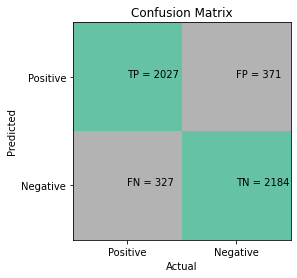

In [27]:
# Data preprocessing - lower casing, punctuation removal, tokenisation(NLTK), stop word removal
# Features - tf-idf vector (1-grams)

vectorizer = TfidfVectorizer(stop_words=stop_words)  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenised_text)
X_val = vectorizer.transform(X_val_tokenised_text)

model = get_svm_predictions(X_train, X_val, y_train, y_val)

Accuracy: 0.8602566714198411


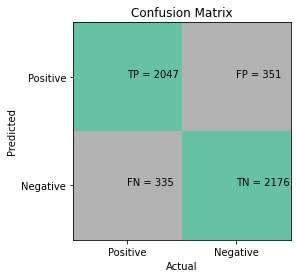

In [28]:

vectorizer = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

model = get_svm_predictions(X_train, X_val, y_train, y_val)

Accuracy: 0.8690160928906091


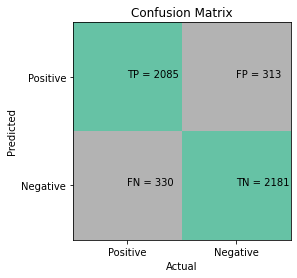

In [29]:
# Data preprocessing - lower casing, punctuation removal
# Features - tf-idf vector (1-grams)

vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

model = get_svm_predictions(X_train, X_val, y_train, y_val)

In [ ]:
#test performance 